# NaiveBayes

## Own Implementation

Own Implementation Naive Bayes Statistics
Confusion Matrix
121|11
--------
9|119
Accuracy: 0.923076923077
Precision: 0.916666666667
Recall: 0.930769230769
F1 Score: 0.923664122137


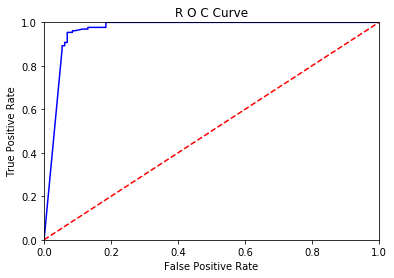

In [1]:
import os
import math
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import auc,roc_curve

#Common Functions:
def get_emails(path):
    documents = os.listdir("./EmailsData/"+path)
    emails=[]
    total=len(documents)
    for file in documents:
        f = open("./EmailsData/"+path+"/" + file)
        emails.append(f.read())
    return emails,total

non_spam,total_non_spam=get_emails("nonspam-train")
spam,total_spam=get_emails("spam-train")
test_non_spam,test_total_non_spam=get_emails("nonspam-test")
test_spam,test_total_spam=get_emails("spam-test")


#Merge, Vectorize and Select K Best Features
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english')
s=non_spam+spam
X2_train_features = vectorizer.fit_transform(s)
y1_train_labels = np.zeros(total_spam)
y2_train_labels = np.ones(total_non_spam)
Y=np.append(y1_train_labels,y2_train_labels)
c = SelectKBest(chi2, k = 50)
X_train_features = c.fit_transform(X2_train_features, Y)
a=X_train_features.toarray()

#Calculate Mean and Variance
mean0=[]
std0=[]
mean1=[]
std1=[]
for i in range(0,50):
    mean1.append(a[:350,i].mean())
    std1.append(a[:350, i].std())
    mean0.append(a[350:, i].mean())
    std0.append(a[350:, i].std())
    pass


#Testing Variables
ts=test_non_spam+test_spam
x=vectorizer.transform(ts)
p=c.transform(x)
q=p.toarray()
l=0

#Function for calculating Likelihood
def check(i):
    k=0
    prob0=0
    prob1=0
    for j in i:
        if float(j) is not float(0):
            if float(std0[k])!=0.0:
                r=math.exp(-(((j - mean0[k]) ** 2) / (2 * (std0[k] ** 2)))) / (math.sqrt(2 * 3.14 * (std0[k] ** 2)))
                if r!=0:
                    prob0=prob0+math.log(r)
            if float(std1[k])!=0.0:
                r=math.exp(-(((j-mean1[k])**2)/(2*(std1[k]**2))))/(math.sqrt(2*3.14*(std1[k]**2)))
                if r!=0:
                    prob1=prob1+math.log(r)
        k=k+1
    return prob0,prob1

TP=0
TN=0
FP=0
FN=0
p0l=[]
p1l=[]

#for non_Spam
for i in q[:130]:
    p0,p1=check(i)
    p0l.append(p0)
    p1l.append(p1)
    if p0<p1:
        TP=TP+1
    else:
        FN=FN+1
#for spam
for i in q[130:]:
    p0,p1=check(i)
    p0l.append(p0)
    p1l.append(p1)
    if p1<p0:
        TN=TN+1
    else:
        FP=FP+1

#calculating Posterior for ROC curve
problh=[]
for i in range(0,len(p0l)):
    p0e=math.exp(p0l[i])
    p1e=math.exp(p1l[i])
    l=float(p0e)+float(p1e)
    l=math.log(l)
    a=float(p0l[i])-l
    b=float(p1l[i])-l
    problh.append([a,b])
    
#printing results
print "Own Implementation Naive Bayes Statistics"
print "Confusion Matrix"
print "================="
print str(TP)+"|"+str(FP)
print "--------"
print str(FN)+"|"+str(TN)

Accuracy=((TP+TN)/float(TP+TN+FP+FN))
Recall=float(TP)/(TP+FN)
Precision=float(TP)/(TP+FP)
F1_Score=2*((Precision*Recall)/float(Precision+Recall))
TPR=TP/float(TP+FN)
FPR=FP/float(FP+TN)
print "========================"
print "Accuracy: "+str(Accuracy)
print "Precision: "+str(Precision)
print "Recall: "+str(Recall)
print "F1 Score: "+str(F1_Score)
print "========================"

y=np.append(np.zeros(130),np.ones(130))
problh=np.array(problh)
f, t, thr = roc_curve(y, problh[:,0])
r_a= auc(f, t)
plt.title('R O C Curve')
plt.plot(f, t, 'b', label = 'AUC = %0.2f' % r_a)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Library Implementation

Own Implementation Naive Bayes Statistics
Confusion Matrix
130|0
--------
4|126
Accuracy: 0.984615384615
Precision: 1.0
Recall: 0.970149253731
F1 Score: 0.984848484848



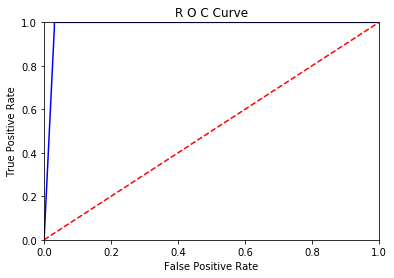

In [2]:
import os
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.naive_bayes import GaussianNB
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

#
# #Common Functions:
def get_emails(path):
    documents = os.listdir("./EmailsData/"+path)
    emails=[]
    total=len(documents)
    for file in documents:
        f = open("./EmailsData/"+path+"/" + file)
        emails.append(f.read())
    return emails

#non_spam==0
#spam==1

#Merge, Vectorize and Select K Best Features
train_labels=numpy.append(np.zeros(350),np.ones(350))
non_spam=get_emails("nonspam-train")
spam=get_emails("spam-train")
train=non_spam+spam
vectorizer = TfidfVectorizer()
v=vectorizer.fit_transform(train)

ch2=SelectKBest(chi2,k=50)
s=ch2.fit_transform(v,train_labels)
model1 = GaussianNB()
model1.fit(s.toarray(),train_labels)

non_spam_t=get_emails("nonspam-test")
spam_t=get_emails("spam-test")
test=non_spam_t+spam_t
v=vectorizer.transform(test)
s=ch2.transform(v)
s=s.toarray()


#testing Every Email
TP=TN=FP=FN=0
for i in s[:130]:
    p=model1.predict([i])
    if p[0]==0:
        TN=TN+1
    else:
        FN=FN+1
for i in s[130:]:
    p=model1.predict([i])
    if p[0]==1:
        TP=TP+1
    else:
        FP=FP+1

#priting result
print "Own Implementation Naive Bayes Statistics"
print "Confusion Matrix"
print "================="
print str(TP)+"|"+str(FP)
print "--------"
print str(FN)+"|"+str(TN)
print "================="
Accuracy=((TP+TN)/float(TP+TN+FP+FN))
Recall=float(TP)/(TP+FN)
Precision=float(TP)/(TP+FP)
F1_Score=2*((Precision*Recall)/float(Precision+Recall))
print "Accuracy: "+str(Accuracy)
print "Precision: "+str(Precision)
print "Recall: "+str(Recall)
print "F1 Score: "+str(F1_Score)
print "================="

probs = model1.predict_proba(s)
p = probs[:,1]
y=np.append(np.zeros(130),np.ones(130))
f, t, thr = roc_curve(y, p)
print 
r_a= auc(f, t)
plt.title('R O C Curve')
plt.plot(f, t, 'b', label = 'AUC = %0.2f' % r_a)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()